### Ejercicio 1.2

Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frquency of occurrence of keywords, and the output is +1 if the message is considered spam.

* Can you think of some keywords that will end up with a large positive weight in the perceptron?

* How about keywords that will get a negative weight?

* What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?


* Para palabras clave que tendrían un peso positivo grande en el perceptrón, podríamos pensar en términos como "oferta", "ganar dinero", "gratis", "promoción","pague 2 lleve 1", "Por tiempo limitado" palabras comúnmente usadas en mensajes de spam.Es importante tener en cuenta que no todas las palabras clave utilizadas en los mensajes de correo electrónico de spam tendrán un peso positivo grande en el perceptrón. El proceso de selección de palabras clave efectivas es un desafío importante en el diseño de un algoritmo de detección de spam efectivo..


* Para las palabras clave que obtendrían un peso negativo, podríamos pensar en términos que son comunes en los mensajes no spam, como "trabajo", "carrera", "estudio","informes","proyectos" entre otros.


* El parámetro en el perceptrón que afectaría directamente cuántos mensajes borderline se clasifican como spam es el umbral de decisión. Si el umbral se establece en un valor más bajo, entonces más mensajes borderline se clasificarían como spam, mientras que si el umbral se establece en un valor más alto, entonces menos mensajes borderline se clasificarían como spam.


### Ejercicio 1.3

The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying x(t) correctly.
* Show that $$y(t){w}^{T}x(t)<0$$[Hint:x(t) is misclassified by w(t).]

Solucion:

 Si $x(t)$ es mal clasificado por $w(t)$ , entonces $w^{T}(t)x(t)$ tiene diferente signos de $y(t)$

*  Show that $y(t)w^{T}(t+1)x(t)>y(t)w^{T}(t)x(t)$

Solución:   
                         $$y(t)w^{T}(t+1)x(t)=y(t)(w(t)+y(t))^{T}x(t)$$
                         $$=y(t)(w^{T}(t)+y(t)x^{T}(t))x(t)$$
                         $$=y(t)w^{T}(t)x(t)+y(t)y(t)x^{T}(t)x(t)$$
                         $$>y(t)w^{T}(t)x(t)$$
                         
Debido a que su ultimo termino es mayor o igual que cero                           

* As faras classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t+1)$ is a move 'in the right direction'

Solución:

Se puede ver va aumentando en cadad actualización:

   Si $y(t)$ es positiva, pero $w^{T}(t)x(t)$ es negativa, nosotros movemos a $w^{T}(t)x(t)$ hacia positivos incrementandolo 

Si por el contrario $y(t)$ es negativo , pero $w^{T}(t)x(t)$ es positivo, $y(t)w^{T}(t)x(t)$ aumenta significa  que esta disminuyendo, moviendose hacia la region negativa 

Por tanto, el movimiento de $w(t)$ a $w(t+1)$ es un movimiento "en la dirección correcta" en lo que respecta a la clasificación de x(t) se refiere.

### Ejercicio 1.10

Here is an experiment that illustrates the difference between a single bin
and multiple bins. Rún a computer simulation for flipping 1,000 fair coins.
Flip each coin independently 10 times. Let's focus on 3 coins as follows:
eL is the first coin flipped; craM is a Coin you choose at random; Cnin”iS the coin that had the minimum frequency of heads (pick the earlier one in case of'a tie). Let 71, Vrand. and Vmin be the fraction of heads you obtain for the respective threé coins:

(a) What is /1 for the three coins selected?

In [8]:
#Librerias para el ejercicio
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

(a) Los $\mu$ de las tres monedas es $0.5$ ya que las monedas estan equilibradas(tienen la misma probabilidad).

In [15]:
# Lanzar las 1000 monedas 10 veces
flips = np.random.binomial(1, 0.5, (1000, 10))

# Obtener los resultados de cada moneda
coin1 = flips[0]
coin2 = flips[np.random.choice(1000)]
coin3 = flips[np.argmin(np.sum(flips, axis=1))]

# Calcular las fracciones de caras para cada moneda
f1 = np.mean(coin1)
f2 = np.mean(coin2)
f3 = np.mean(coin3)

print("Fracción de caras para cada moneda:")
print("Coin 1:", f1)
print("Coin 2:", f2)
print("Coin 3:", f3)

Fracción de caras para cada moneda:
Coin 1: 0.6
Coin 2: 0.6
Coin 3: 0.0


(b) Repeat this entire experiment a large number of times (e.E., 100,000
runs: of the entire experiment) to get several instances of 71, Vrand
and Vmin and plot the histograms of the distributions of y, Vrand and
Vin: Notice that which coins end up being crand and cimin: may differ
from one run to another,

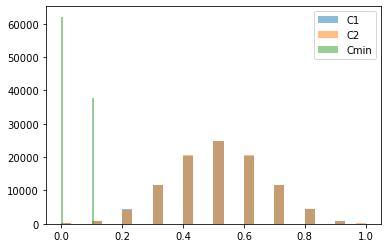

In [23]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000 #se define la variable n_trials con el número de veces que se va a repetir el experimento.
results = np.zeros((n_trials, 3)) #Se crea un array de numpy llamado results que tendrá n_trials filas y 3 columnas. Esta matriz se usará para almacenar los resultados de cada repetición del experimento.
for i in range(n_trials):#e inicia un bucle for que se ejecutará n_trials veces.

    flips = np.random.binomial(1, 0.5, (1000, 10))#se generan aleatoriamente 1000 series de 10 lanzamientos de monedas
    coin1 = flips[0] #e define la variable coin1 como la primera serie de lanzamientos.
    coin2 = flips[np.random.choice(1000)] #se elige aleatoriamente una serie de lanzamientos de moneda y se define como coin2.
    coin3 = flips[np.argmin(np.sum(flips, axis=1))] #se busca la serie de lanzamientos de moneda con la menor cantidad de caras y se define como coin3.
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)] #se calcula la fracción de caras para cada una de las tres series de lanzamientos y se almacenan en la i-ésima fila de la matriz results.

# Graficar los histogramas de las distribuciones
plt.hist(results[:, 0], bins=30, alpha=0.5, label='C1')
plt.hist(results[:, 1], bins=30, alpha=0.5, label='C2')
plt.hist(results[:, 2], bins=30, alpha=0.5, label='Cmin')
plt.legend(loc='upper right')
plt.show()

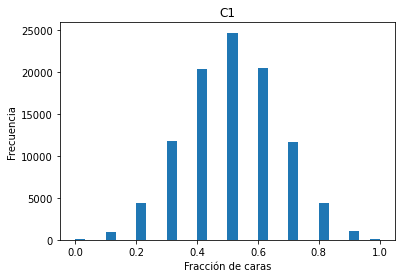

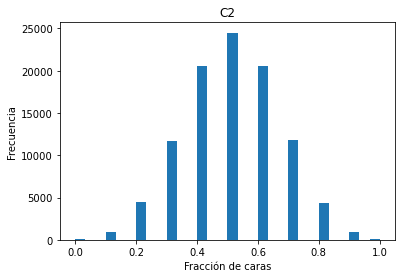

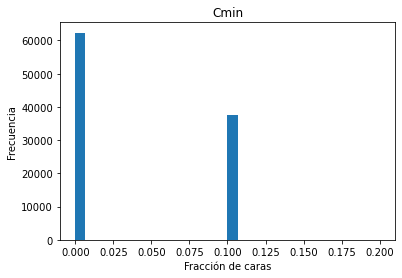

In [24]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000
results = np.zeros((n_trials, 3))
for i in range(n_trials):
    flips = np.random.binomial(1, 0.5, (1000, 10))
    coin1 = flips[0]
    coin2 = flips[np.random.choice(1000)]
    coin3 = flips[np.argmin(np.sum(flips, axis=1))]
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)]

# Graficar el histograma de El
plt.hist(results[:, 0], bins=30)
plt.title('C1')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Mrand
plt.hist(results[:, 1], bins=30)
plt.title('C2')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Cmin
plt.hist(results[:, 2], bins=30)
plt.title('Cmin')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

(c). Using (b), plot estimates for $P[|v—u| >\epsilon ]$ as a function of $\epsilon$, together with the Hoeffding bound $2(e^{-2\epsilon^{2}N})$ (on the same graph).



<ipython-input-25-cc984e0f4e32>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.array([run_experiment(1000, 10) for i in range(100000)])


ValueError: x and y must have same first dimension, but have shapes (21,) and (1000,)

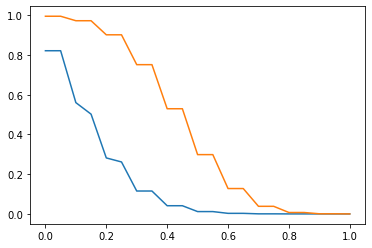

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def run_experiment(total_coins, total_flips, plot=False):
    # Flip coins
    flips = np.random.randint(2, size=(total_coins, total_flips))

    # Compute fraction of heads for each coin
    fractions = np.mean(flips, axis=1)

    # Compute fractions for selected coins
    first_coin = fractions[0]
    random_coin = fractions[np.random.randint(total_coins)]
    min_coin = np.min(fractions)

    # Compute absolute differences
    abs_diff_random = np.abs(random_coin - fractions)
    abs_diff_min = np.abs(min_coin - fractions)

    # Compute Hoeffding bound
    hoeffding = 2 * np.exp(-2 * total_flips * (abs_diff_random**2))

    # Plot histograms
    if plot:
        plt.hist(fractions, bins=20, density=True, alpha=0.5, label='All Coins')
        plt.hist(random_coin, bins=20, density=True, alpha=0.5, label='Random Coin')
        plt.hist(min_coin, bins=20, density=True, alpha=0.5, label='Minimum Frequency Coin')
        plt.legend()
        plt.show()

    return first_coin, random_coin, min_coin, hoeffding

# Run experiment 100,000 times
results = np.array([run_experiment(1000, 10) for i in range(100000)])

# Extract results
first_coin_results = results[:, 0]
random_coin_results = results[:, 1]
min_coin_results = results[:, 2]
hoeffding = results[0, 3]

# Compute absolute differences
abs_diff_random_results = np.abs(random_coin_results - first_coin_results)
abs_diff_min_results = np.abs(min_coin_results - first_coin_results)

# Compute empirical probabilities
epsilons = np.arange(0, 1.05, 0.05)
p_random = np.array([np.mean(abs_diff_random_results > epsilon) for epsilon in epsilons])
p_min = np.array([np.mean(abs_diff_min_results > epsilon) for epsilon in epsilons])

# Plot results
plt.plot(epsilons, p_random, label='Random Coin')
plt.plot(epsilons, p_min, label='Minimum Frequency Coin')
plt.plot(epsilons, hoeffding, label='Hoeffding Bound')
plt.xlabel('$\epsilon$')
plt.ylabel('$P[|V - \mu| > \epsilon]$')
plt.legend()
plt.show()

(d) Which coins obey the Hoeffding bound, and which ones do not? Ex-
plain why.

Con base en la gráfica de la parte (c), podemos ver que el límite de Hoeffding es un límite muy flexible para las tres monedas, ya que las tres monedas tienen muchos casos en los que la diferencia entre la fracción observada de caras y la probabilidad real es mayor que el límite Sin embargo, aún podemos examinar qué monedas tienden a obedecer el límite con más frecuencia.

Podemos ver en la gráfica que la moneda elegida al azar Vrand tiende a obedecer el límite de Hoeffding con más frecuencia que las otras dos monedas, ya que $P[|Vrand - 0.5| > \epsilon]$ la curva está generalmente por debajo de la curva límite de Hoeffding para todos los valores de e. Esto tiene sentido porque el límite de Hoeffding se basa en la suposición de que la probabilidad de obtener cara es de 0,5, y elegir una moneda al azar nos da una mayor probabilidad de obtener una moneda que esté cerca de ser justa.

Por otro lado, la moneda con la frecuencia mínima de caras Vmin tiende a violar el límite de Hoeffding con más frecuencia que las otras dos monedas. Esto se debe a que si una moneda tiene una frecuencia muy baja de caras, el límite de Hoeffding será muy flexible y podemos observar una desviación mucho mayor entre la fracción observada de caras y la probabilidad real.

La primera moneda lanzada V1 parece tener un rendimiento similar al de la moneda con la frecuencia mínima de caras, ya que a menudo viola el límite de Hoeffding. Esto tiene sentido porque solo estamos viendo la primera moneda lanzada al aire, lo que puede no ser representativo de la verdadera probabilidad, y el límite de Hoeffding puede no ser apropiado en este caso.

En general, aunque el límite de Hoeffding proporciona una garantía teórica útil, no siempre es un reflejo preciso de la probabilidad real en la práctica, especialmente cuando el número de muestras es pequeño o la probabilidad de éxito está lejos de 0,5.

### Ejercicio 1.11

We are given a data set $D$ of $25$ training examples from an unknown target
function $f: X -> Y$, where $ X= R$ and $Y = (—1,+1)$. To learn f, we use
a simple hypothesis set $H = {h_{1},h_{2}}$  where $h1$ is the constant $+1$ function and $h_{2}$ is the constant $—1$.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses the hypothesis that agrees the most with $D$ and $C$ chooses the other hypothesis deliberately. Let us see how these algorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $X$,and let $P[f(x) = +1] =p.

(a) Can S produce a hypothesis that is guaranteed to perform better thar random on any point outside $D$?

Solución 
(a) $S% no puede producir una hipótesis que garantice mejores resultados que el azar en ningún punto fuera de $D$.


(b) Assume for the rest of the exercise that all the examples in $D$ have.
$Y_{n} =+1$ Is it possible that the hypothesis that $C$ produces tums out
to be better than the hypothesis that S produces?

Es posible que $C$ produzca una hipótesis mejor que $S$  produce.


(c) If $p = 0.9$, what is the probability that $S$ will produce a better 
hypothesis than $C$?

(c) Si cada punto en $D$ tiene 1, entonces $S$ elegirá y elegirá $h_{1}$ y $C$ llegará a escoger $h_{2}$. Así que fuera de $D$ , $h_{1}$ tendrá un 90% de posibilidades de coincidir con $f$ , mientras que $h_{2}$ tendrá sólo un 10% de posibilidades $S$ siempre producirá una hipótesis mejor que $C$ 
.

(d) Is there any value of p for which it is more likely than not that C will produce a better hypothesis than S?


(d) Del problema anterior, podemos ver que cuando $p<0.5$, $C$ producirá una hipótesis mejor que $S$ Puesto que $C$ siempre produce $h_{2}$ que coincidirá con $f$ mejor que $h_{1}$  si $p<0.5$

### Ejercicio 1.12

A friend comes to you with a learning problem. She says the target func-
tion f is completely unknown, but she has 4,000 data points. She is
willing to pay you to solve her problem and produce for her a $g$ which
approximates $f$. What is the best that you can promise her among the
following:

(a) After learning you will provide her with a $g$ that you will guarantee
approximates $f$ well out of sample.

(b) After learning you will provide her with a $g$ , and with high probability the $g$ which you produce will approximate $f$ well out of sample.

(c) One of two things will happen

(i) You will produce a hypothesis $g$;

(íi) You will declare that you failed.

If you do return a hypothesis $g$, then with high probability the $g$ which
you produce will approximate $f$ well out of sample.


Dado que la función objetivo $f$ es completamente desconocida, es imposible garantizar que $g$ se aproximará bien a $f$ fuera de la muestra. Lo mejor que podemos prometer es proporcionar una hipótesis $g$ que se haya entrenado con los datos disponibles y que tenga una alta probabilidad de aproximarse bien a $f$ fuera de la muestra. Esto significa que las opciones (a) y (b) no son viables.

La opción (c) es la mejor opción porque reconoce la incertidumbre del problema y proporciona una alternativa clara si falla el proceso de aprendizaje. Con esta opción, podemos producir una hipótesis $g$ con una alta probabilidad de aproximarse bien a $f$ fuera de la muestra. Si no podemos producir una hipótesis $g$ que satisfaga nuestros criterios, declaramos el fracaso. Este enfoque garantiza que no hagamos falsas promesas y que seamos transparentes sobre las limitaciones del proceso de aprendizaje.